In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv(r'https://raw.githubusercontent.com/G1Codes/digit-recognizer/refs/heads/main/digit-recognizer_train.csv')

In [56]:
df.shape

(42000, 785)

In [57]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
10948      6       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
10948       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
10948         0         0         0         0         0  

[1 rows x 785 columns]

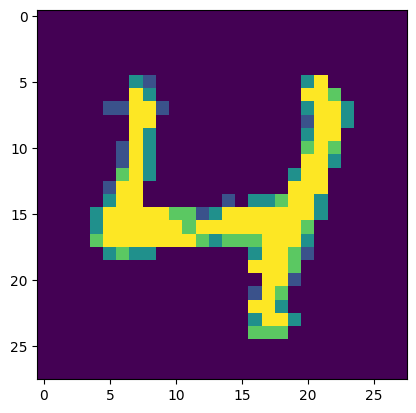

In [58]:
plt.imshow(df.iloc[130,1:].values.reshape(28,28))

In [59]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape

(33600, 784)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

14.063096284866333


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf.shape

(33600, 200)

In [66]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.9507142857142857

In [30]:
for i in range(1,785):
    pcalist=[]
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier(n_jobs=-1)
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    pcalist.append(print(i, accuracy_score(y_test,y_pred)))
    

1 0.2580952380952381
2 0.3236904761904762
3 0.5104761904761905
4 0.6663095238095238
5 0.7378571428571429
6 0.8227380952380953
7 0.8436904761904762
8 0.8721428571428571
9 0.886547619047619
10 0.9055952380952381
11 0.9116666666666666
12 0.9184523809523809
13 0.9276190476190476
14 0.9351190476190476
15 0.9384523809523809
16 0.9379761904761905
17 0.9407142857142857
18 0.94
19 0.9425
20 0.9442857142857143
21 0.9438095238095238
22 0.9441666666666667
23 0.9442857142857143
24 0.9457142857142857
25 0.9484523809523809
26 0.9479761904761905
27 0.9478571428571428
28 0.9471428571428572
29 0.949047619047619
30 0.9491666666666667
31 0.9507142857142857
32 0.9513095238095238
33 0.95
34 0.9504761904761905
35 0.950952380952381
36 0.9519047619047619
37 0.9517857142857142
38 0.9527380952380953
39 0.9533333333333334
40 0.9528571428571428
41 0.9522619047619048
42 0.9522619047619048
43 0.9523809523809523
44 0.9533333333333334
45 0.9528571428571428
46 0.9530952380952381
47 0.9530952380952381
48 0.9533333333333

KeyboardInterrupt: 

In [67]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [68]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [69]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [70]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [71]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [73]:
# Eigen vectors
pca.components_.shape


(3, 784)

In [76]:
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926968, 3.80423901])

In [77]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

pca.explained_variance_.shape

(784,)

In [79]:
pca.components_

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-0., -0., -0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [78]:
pca.components_.shape

(784, 784)

In [80]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [81]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

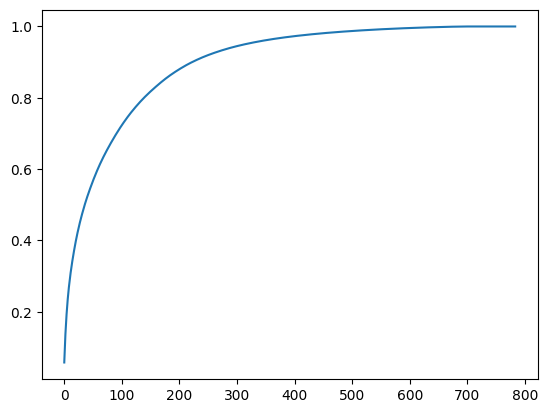

In [82]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))